# Part I - (Dataset Exploration Title)
## by (Oladapo Bolaji Tosin)

## Introduction
> The "New York Bike Sharing" dataset provides information on bike sharing usage in New York. The purpose of the dataset is to investigate the factors that drive participation in the bike sharing system. The dataset includes information on various attributes such as duration of the trip, start and end time, start and end station names, user type, member gender, bike share type, day of the trip, age, start time hour, and age group. With a total of **183412** observations and **16** variables, the data provides insights into the usage patterns of the bike sharing system. By analyzing variables such as user type, member gender, and age group, one can determine which demographic segments are most likely to participate in the bike sharing system. The data also provides information on trip duration, start and end time, and day of the week, which can be used to analyze *usage patterns and identify peak usage times*.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
print(df_bike.head())
print(df_bike.shape)
print(df_bike.dtypes)

   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13

In [3]:
df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [4]:
df_bike = df_bike.dropna().reset_index(drop= True) #drops missing values and reset row index.

In [5]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [6]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 21.4+ MB


In [7]:
#converts the start_time and end_time to date time.

df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

df_bike['start_time_hour'] = df_bike['start_time'].dt.hour

In [8]:
df_bike['day'] = df_bike['start_time'].dt.day_name() # creates the day column

day_name_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the day names based on the custom list
df_bike['day'] = pd.Categorical(df_bike['day'], categories=day_name_order, ordered=True)


In [9]:
df_bike['age'] = 2023 - df_bike['member_birth_year']  # creates the age column

In [10]:
df_bike['age'].describe()

count    174952.000000
mean         38.196865
std          10.118731
min          22.000000
25%          31.000000
50%          36.000000
75%          43.000000
max         145.000000
Name: age, dtype: float64

In [11]:
# binning the age column

bins = [18, 26, 52, 141]
df_bike['age_group'] = pd.cut(df_bike['age'], bins, labels=['Gen Z', 'millennials', 'older Gen'])

In [12]:
df_bike = df_bike[['duration_sec', 'user_type', 'start_time', 'end_time', 'start_station_name', 'end_station_name', 'member_gender', 'day', 'age', 'age_group', 'start_time_hour','bike_share_for_all_trip']]

In [13]:
print(df_bike.info())

print(df_bike.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 12 columns):
duration_sec               174952 non-null int64
user_type                  174952 non-null object
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_name         174952 non-null object
end_station_name           174952 non-null object
member_gender              174952 non-null object
day                        174952 non-null category
age                        174952 non-null float64
age_group                  174951 non-null category
start_time_hour            174952 non-null int64
bike_share_for_all_trip    174952 non-null object
dtypes: category(2), datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 13.7+ MB
None
(174952, 12)


In [14]:
df_bike.to_csv('bike_clean.csv', index= False)

In [15]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 12 columns):
duration_sec               174952 non-null int64
user_type                  174952 non-null object
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_name         174952 non-null object
end_station_name           174952 non-null object
member_gender              174952 non-null object
day                        174952 non-null category
age                        174952 non-null float64
age_group                  174951 non-null category
start_time_hour            174952 non-null int64
bike_share_for_all_trip    174952 non-null object
dtypes: category(2), datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 13.7+ MB


### What is the structure of your dataset?

> There are 174,952 rides in the dataset with 12 features (duration_sec, start_time, end_time, start_station_name, end_station_name, user_type, member_gender, bike_share_for_all_trip, day, age, start_time_hour, age_group).

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is the bike_share_for_all_trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features duration_sec, user_type, start_time, end_time, member_gender, day, age, age_group will help in my investigation into my features of interest.

## Univariate Exploration

In [16]:
def plot_count(variable, x, y, z):
    """creates a bar chart for the specified variable."""
    colour= sb.color_palette()[0]
    sb.countplot(data= df_bike, x= variable, color= colour)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z)
    
def plot_count_day(variable, x, y, z):
    """creates a bar chart for the specified variable."""
    colour= sb.color_palette()[0]
    sb.countplot(data= df_bike.sort_values(by='day'), x= variable, color= colour)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z)
    
def percentage_user(variable):
    """creates the percentage of the value counts of the specified variable."""
    print(round(df_bike[variable].value_counts()/df_bike[variable].value_counts().sum() * 100,1).astype(str) + '%')

# What is the age range those most users fall

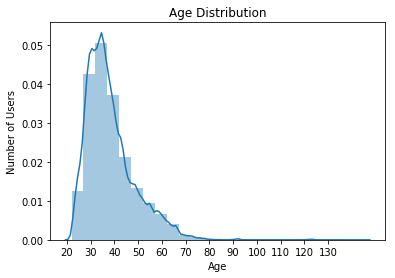

In [17]:
tick = np.arange(20,140,10)
bin_edges = np.arange(22,141,5)
sb.distplot(df_bike['age'],bins= bin_edges)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Age Distribution')
plt.xticks(tick);

It is observed that the age data is skewed to the right, The investigation of those points is done in the next cells.

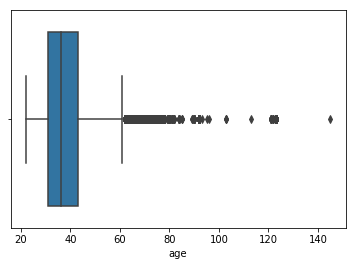

In [18]:
sb.boxplot(x=df_bike['age']);

In [19]:
# checking for the number of outlier rows.


(df_bike['age'] < 60).value_counts()

True     167065
False      7887
Name: age, dtype: int64

In [20]:
# removing outliers

df_bike = df_bike[df_bike['age'] < 60]

df_bike.head()

,duration_sec,user_type,start_time,end_time,start_station_name,end_station_name,member_gender,day,age,age_group,start_time_hour,bike_share_for_all_trip
0,52185,Customer,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Male,Thursday,39.0,millennials,17,No
1,61854,Customer,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Male,Thursday,51.0,millennials,12,No
2,36490,Subscriber,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Other,Thursday,34.0,millennials,17,No
3,1585,Subscriber,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Male,Thursday,49.0,millennials,23,Yes
5,1147,Subscriber,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,Female,Thursday,40.0,millennials,23,No


In [21]:
# checking for the number of outlier rows

(df_bike['age'] < 60).value_counts()

True    167065
Name: age, dtype: int64

It is observed that a large part of users have an age range of 25-45. Also the outlier ages are those that fall outside 60.

# Age group with the highest usage

In [22]:
percentage_user('age_group')

millennials    87.5%
Gen Z           6.5%
older Gen       6.0%
Name: age_group, dtype: object


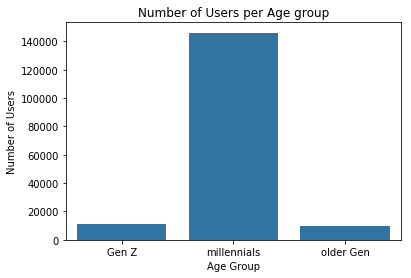

In [23]:
plot_count('age_group', 'Age Group', 'Number of Users', 'Number of Users per Age group')

It is observed that the millennials are the most active users of the system, accounting for 87.5% of usage.

# Days with the highest usage

In [24]:
print(percentage_user('day'))

df_bike['day'].value_counts()

Thursday     19.2%
Tuesday      17.5%
Wednesday    16.3%
Friday       15.8%
Monday       14.7%
Sunday        8.3%
Saturday      8.2%
Name: day, dtype: object
None


Thursday     32121
Tuesday      29260
Wednesday    27174
Friday       26398
Monday       24480
Sunday       13862
Saturday     13770
Name: day, dtype: int64

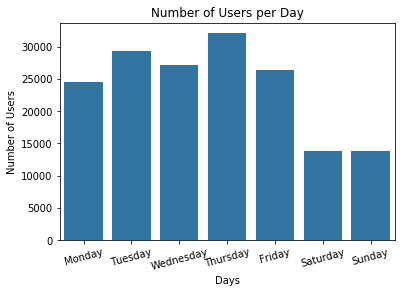

In [25]:
plot_count_day('day', 'Days', 'Number of Users', 'Number of Users per Day')
plt.xticks(rotation= 15);

It was observed that there was more patronage on weekdays then weekends with saturday(8.2%) and sunday(8.3%) been the lowest on patronage. The lowest usage on weekdays which is monday(25,641) is almost as much as the combined usage of saturday and sunday(28,926).

# Peak Hour for Bike sharing System

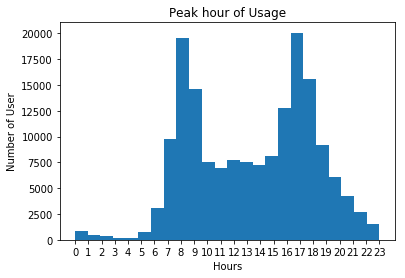

In [26]:
hours = np.arange(0,24)
plt.hist(data = df_bike, x= 'start_time_hour', bins= 24);
plt.xlabel('Hours')
plt.ylabel('Number of User')
plt.title('Peak hour of Usage')
plt.xticks(hours);

It is observed that the demand for the bikes peaks at 8am and 5pm. 

# The highest number of users per user type.

In [27]:
percentage_user('user_type')

Subscriber    90.4%
Customer       9.6%
Name: user_type, dtype: object


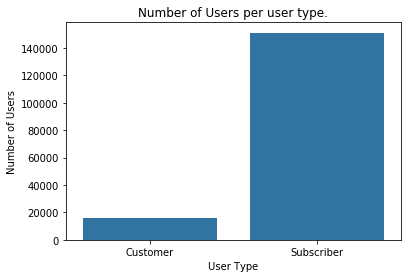

In [28]:
plot_count('user_type', 'User Type', 'Number of Users', 'Number of Users per user type.')

It is observed that there were more rides from the subscribers than the Customers, putting it to numbers, There 90.4% of the system usage came from subscribers to 9.6% from Customers.

# The highest user per gender

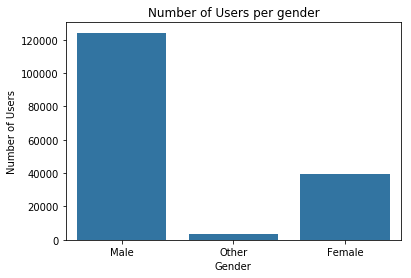

In [29]:
plot_count('member_gender', 'Gender', 'Number of Users', 'Number of Users per gender')

In [30]:
percentage_user('member_gender')

Male      74.4%
Female    23.5%
Other      2.1%
Name: member_gender, dtype: object


it was observed that 74.4% of the system usage comes from the male gender, while 23.5% of its usage comes from the female gender and other genders contribute the remaining 2.1% of its usage.

# What the top 10 start station with the most trips

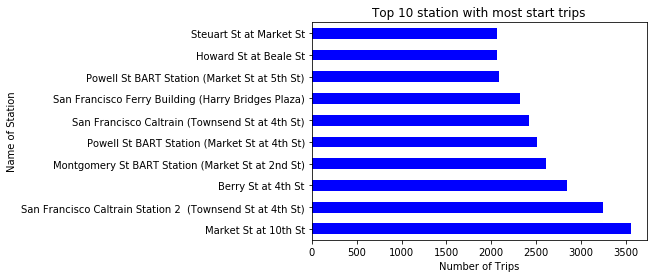

In [31]:
df_bike.groupby('start_station_name').agg('count')['bike_share_for_all_trip'].sort_values(ascending=False).head(10).plot(kind= 'barh', color= 'blue')
plt.xlabel('Number of Trips')
plt.ylabel('Name of Station')
plt.title('Top 10 station with most start trips');

It is observed that the **Market St at 10th St** station has the highest count for where trips started.

# What the top 10 end station with the most trips

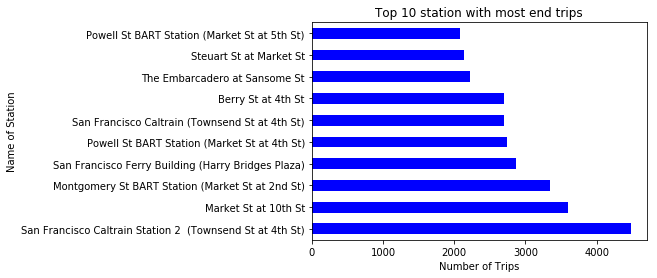

In [32]:
df_bike.groupby('end_station_name').agg('count')['bike_share_for_all_trip'].sort_values(ascending=False).head(10).plot(kind= 'barh', color= 'blue')
plt.xlabel('Number of Trips')
plt.ylabel('Name of Station')
plt.title('Top 10 station with most end trips');

It is observed that the **San Francisco Caltrain Station 2** has the highest count for the station where trips ended.

# Distribution of Bike Sharing

In [33]:
percentage_user('bike_share_for_all_trip')

No     90.3%
Yes     9.7%
Name: bike_share_for_all_trip, dtype: object


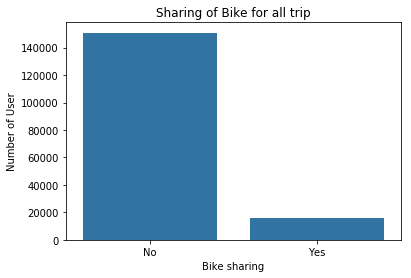

In [34]:
plot_count('bike_share_for_all_trip', 'Bike sharing', 'Number of User', 'Sharing of Bike for all trip')

It is observed that 90.3% of the users do not share bike for all trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes there were outlier points in the age distribution and the outlier points were dropped. The distribution mostly showed the distribution of usage over various variables. 
- For the age_group variable, it was observed that the millennials were the highest users followed by the gen z and the older generation respectively.

- for the day variable, It was observed that there was greater usage on weekdays than weekends.

- for the user_type variable, It was observed that Subscribers use the system more than the customers.

- for the member_gender variable, It was observed that the male gender use the system much more than the others.

- For the bike_share_for_all_trip variable,There are less people who were open to the bike sharing system.

- Market st at 10th st is the busiest start station.

- 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, The outliers in the age column were removed to improve the accuracy and reliability of statistical analysis and to prevent them from distorting results.

## Bivariate Exploration

# What is the age range those most users fall per User type

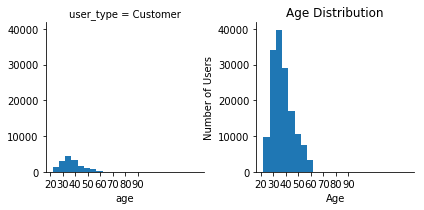

In [35]:
tick = np.arange(20,100,10)
g = sb.FacetGrid(df_bike,col='user_type', sharex=True, sharey=True)
g.map(plt.hist, 'age', bins=bin_edges)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Age Distribution')
plt.xticks(tick);


# What is the number of Usage per gender per age group?

In [36]:
def plot_bivariate(variable, x_label, y_label, title, hue):
    """creates a bar chart for the specified variable."""
    colour= sb.color_palette()[0]
    sb.countplot(data= df_bike, x= variable, color= colour, hue= hue)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
def plot_bivariate_day(variable, x_label, y_label, title, hue):
    """creates a bar chart for the specified variable."""
    colour= sb.color_palette()[0]
    sb.countplot(data= df_bike.sort_values(by= 'day'), x= variable, color= colour, hue= hue)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

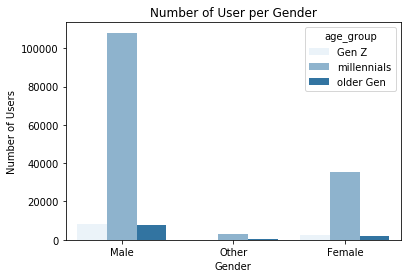

In [37]:
plot_bivariate('member_gender', 'Gender', 'Number of Users', 'Number of User per Gender', 'age_group')

It is observed that the millennial males are more open to the bike sharing system.

# What is the relationship between Age and Bike sharing

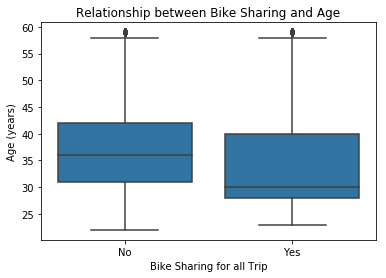

In [38]:
colour= sb.color_palette()[0]
sb.boxplot(data = df_bike, x = 'bike_share_for_all_trip', y = 'age', color = colour)

# Format the plot's visual
plt.xlabel('Bike Sharing for all Trip')
plt.ylabel('Age (years)');
plt.title('Relationship between Bike Sharing and Age');


It is observed that the young users are open to bike sharing.

# Distribution Users gender over days?

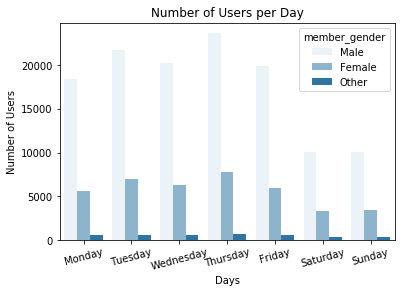

In [39]:
plot_bivariate_day('day', 'Days', 'Number of Users', 'Number of Users per Day', 'member_gender')
plt.xticks(rotation= 15);

It is observed that the male gender are the most active users over all days.

# Which User type is more open to Bike sharing?

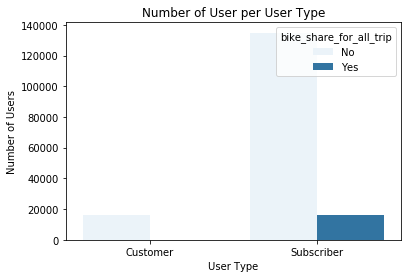

In [40]:
plot_bivariate('user_type', 'User Type', 'Number of Users', 'Number of User per User Type', 'bike_share_for_all_trip')

It is observed that only subscribers are open to sharing bike for all trip.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The findings suggest that younger generations, specifically millennial males, are more receptive to the bike sharing system. This trend is even more pronounced among subscribers, who are open to using the bike sharing system for all trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No!

## Multivariate Exploration

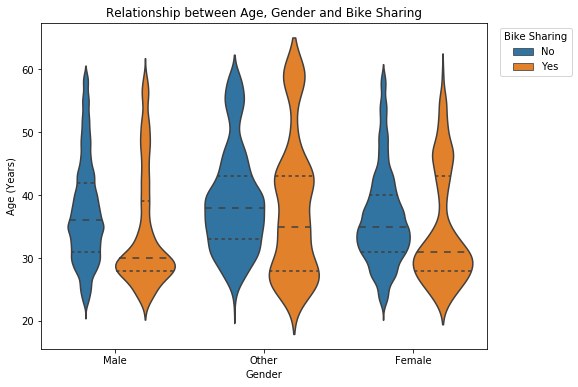

In [41]:
plt.figure(figsize = [8, 6])
sb.violinplot(data = df_bike, x = 'member_gender', y = 'age', hue = 'bike_share_for_all_trip', inner = 'quartile')

# Format the plot's visual
plt.xlabel('Gender')
plt.ylabel('Age (Years)')
plt.title('Relationship between Age, Gender and Bike Sharing')
plt.legend(title='Bike Sharing', bbox_to_anchor=(1.2, 1));

It is observed that across all genders the younger users are open to the bike sharing service.

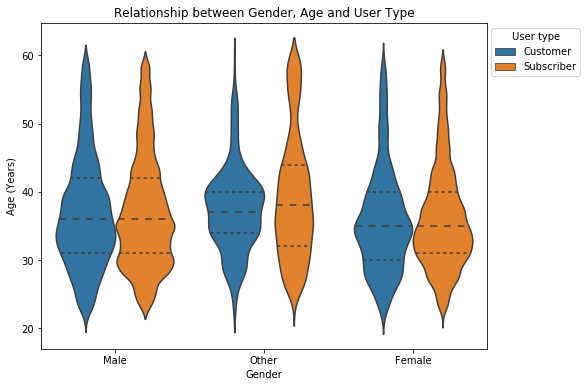

In [42]:
plt.figure(figsize = [8, 6])
sb.violinplot(data = df_bike, x = 'member_gender', y = 'age', hue = 'user_type', inner = 'quartile')

# Format the plot's visual
plt.xlabel('Gender')
plt.ylabel('Age (Years)')
plt.title('Relationship between Gender, Age and User Type')
plt.legend(title='User type', bbox_to_anchor=(1.22, 1));

It is observed that the user type variable has a very weak relationship with the age and member gender variable.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Based on the findings, it seems that the relationship between the user type and the age and member gender variables is weak. However, the relationship between age and user openness to the bike sharing service is strong across all genders, with younger users being more open to the service. This suggests that age is a stronger predictor of user openness to bike sharing than user type or member gender.

### Were there any interesting or surprising interactions between features?

> No interesting or surprising interactions between features were observed.

## Conclusions
The findings of the investigation showed that there were outlier points in the age distribution which were dropped. It was observed that millennials were the highest users of the bike sharing service, followed by the Gen Z and older generations. Usage was higher on weekdays compared to weekends. Subscribers used the system more than customers and males used the system more than other genders. The findings suggest that younger generations, specifically millennial males, are more receptive to the bike sharing system, and this trend is even more pronounced among subscribers. The relationship between user type and age and member gender was found to be weak, but the relationship between age and user openness to bike sharing was strong across all genders, with age being a stronger predictor of user openness than user type or member gender. The Market St at 10th St station was the busiest start station.